In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns =(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[()$]","",regex=True)
    .str.replace("-","_")
    .str.replace(" ","_")
)

In [6]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_k',
       'spending_score_1_100'],
      dtype='object')

In [7]:
df.dtypes

,0
customerid,int64
gender,object
age,int64
annual_income_k,int64
spending_score_1_100,int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerid            200 non-null    int64 
 1   gender                200 non-null    object
 2   age                   200 non-null    int64 
 3   annual_income_k       200 non-null    int64 
 4   spending_score_1_100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,customerid,age,annual_income_k,spending_score_1_100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# selecting features

x=df[['annual_income_k','spending_score_1_100']]
x.head()

,annual_income_k,spending_score_1_100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
# since there is no label, the the modeal can usr only is distence btw points



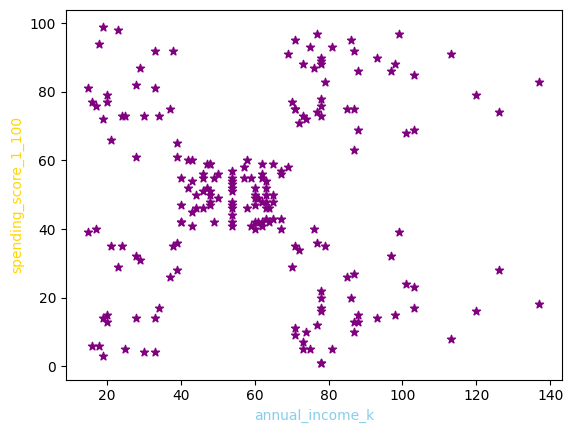

In [12]:
# visualising raw data_table
import matplotlib.pyplot as plt
plt.figure
plt.scatter(df['annual_income_k'],df['spending_score_1_100'],color="purple",marker="*")
plt.xlabel('annual_income_k',color="skyblue")
plt.ylabel('spending_score_1_100',color="gold")
plt.show()

In [13]:
#k means clustering
#k means tries to group pointer so the points in the
#same group are close to each other

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5,random_state=42)
labels = kmeans.fit_predict(x)

# n_cluster,divide the customer into 5 groups
# fit(x)-looks at all data points in x, place 5 random centrodis
# assigns each point to center of assigning points in itration repeat until stable
# for each data point returns which cluster it belongs sto represents them with numeric value

In [14]:
labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [15]:
df["cluster"]=labels
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [16]:
#visualize clustering

In [17]:
# The 'Elbow Method' is a very useful technique for determining the optimal number of clusters (K) in K-Means clustering.
# It works by plotting the Within-Cluster Sum of
# Squares (WCSS) against the number of clusters.

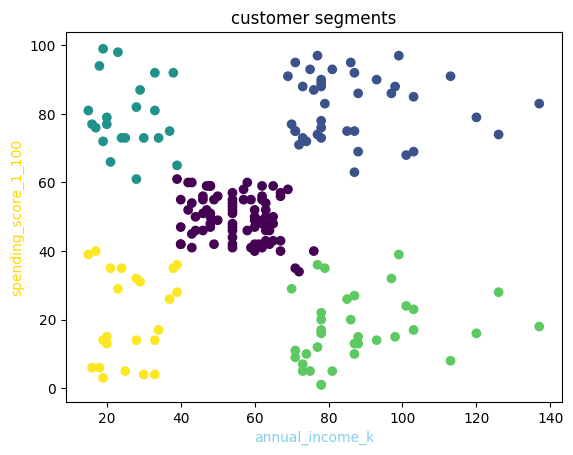

In [18]:
#visualize clusters
plt.scatter(
    x['annual_income_k'],
    x['spending_score_1_100'],

    c=labels
)

plt.xlabel('annual_income_k',color="skyblue")
plt.ylabel('spending_score_1_100',color="gold")
plt.title('customer segments')
plt.show()

In [19]:
# applying PCA here
# Principal Compound analysis - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca= pca.fit_transform(x)


# components = 2 - reducing data 2 dimensions,
# information preserved mostly

# PCA are used when data has many feature so pca compress inforamation
# then we visualize it pca does not create clusters, it helps us see them

Text(0.5, 1.0, 'customer segments')

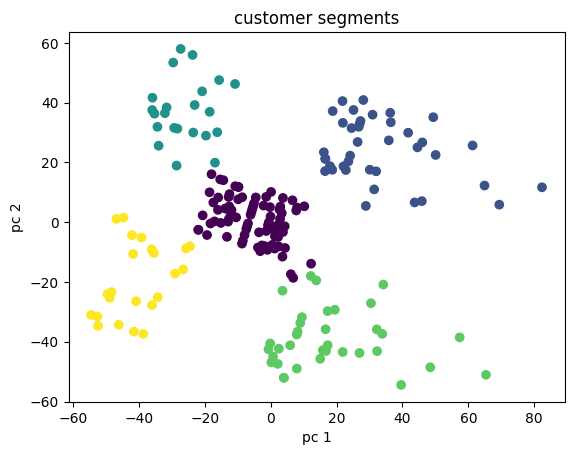

In [20]:
#  visualize clusters using PCA

plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=df['cluster']
 )

plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.title('customer segments')

In [21]:
df.groupby('cluster')[['annual_income_k','spending_score_1_100']].mean()

,annual_income_k,spending_score_1_100
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [22]:
df['segment'] = df['cluster'].map({
    0:'mid income - mid spend',
    1:'high income - high spend',
    2:'low income - high spend',
    3:'high income - low spend',
    4:'low income - low spend'
})

In [23]:
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,cluster,segment
0,1,Male,19,15,39,4,low income - low spend
1,2,Male,21,15,81,2,low income - high spend
2,3,Female,20,16,6,4,low income - low spend
3,4,Female,23,16,77,2,low income - high spend
4,5,Female,31,17,40,4,low income - low spend


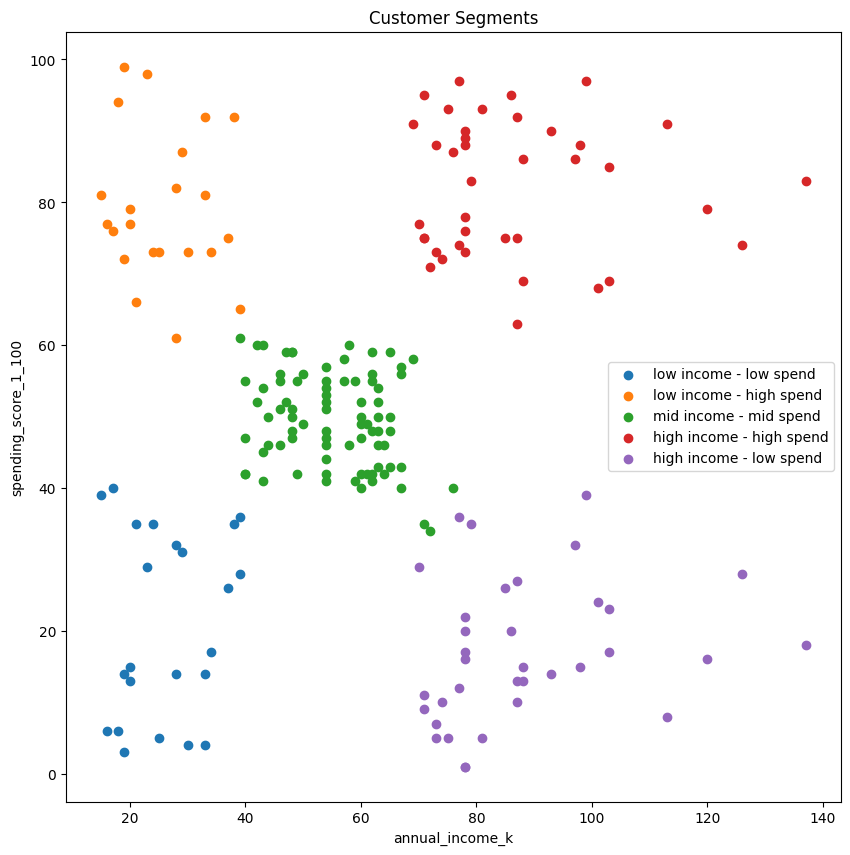

In [24]:
plt.figure(figsize=(10,10))
for segment_name,cluster_id in df[['segment','cluster']].drop_duplicates().itertuples(index=False):
    subset = df[df['cluster'] == cluster_id]
    plt.scatter(
        subset['annual_income_k'],
        subset['spending_score_1_100'],
        label=segment_name
    )
plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1_100')
plt.legend()
plt.title('Customer Segments')
plt.show()

In [25]:
# car - red, yellow, orange, 20k 40k 50k

# car - red yellow orange cost
# car    1.   0.     0.     20k
# car    0.  1.     0.     40k
# car    0.  0.     1.     50k

In [ ]:
#1. more approved or rejected
  approved loans are more than rejected loans.

#2. barchart of loan status
  A bar chart of Loan Status (Approved vs Rejected) typically shows:
  Two bars: Approved and Rejected
  Approved bar is taller
  Helps quickly identify class imbalance

#3. box plot for loan amount
   The bar chart clearly shows the Approved bar is taller than the Rejected bar, meaning most applications are approved.

#4. which group has higher loan apprual
ducation	Approval Rate
Graduate	62.45%
Not Graduate	61.97%
So, Graduates have slightly higher loan approval than Not Graduates.
(But the difference is small.)

#5. which feature looks important for loan apprual
credit history is the most important feature
Loan amounts are widely spread.
There are some very high loan values (outliers).
The middle 50% of loan amounts lie in a moderate range.
This shows loan amounts vary a lot among applicants.